In [158]:
import numpy as np
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [159]:
vehicle=pd.read_csv('Accident_vehicles_2021_2022.csv')
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29254 entries, 0 to 29253
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0.1          29254 non-null  int64 
 1   Unnamed: 0            29254 non-null  int64 
 2   File_Num              29244 non-null  object
 3   District              29254 non-null  object
 4   Neighbourhood         29254 non-null  object
 5   Street_name           29213 non-null  object
 6   Day_name              29254 non-null  object
 7   year                  29254 non-null  int64 
 8   month                 29254 non-null  int64 
 9   Month_name            29254 non-null  object
 10  day                   29254 non-null  int64 
 11  hour                  29254 non-null  int64 
 12  Day_shift             29254 non-null  object
 13  Pedestrian_situation  29254 non-null  object
 14  Vehicle_type          29244 non-null  object
 15  Model                 29242 non-null

In [160]:
persones=pd.read_csv('Accident_people_2021_2022.csv')
persones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17919 entries, 0 to 17918
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Unnamed: 0                    17919 non-null  int64 
 1   File_Num                      17919 non-null  object
 2   District                      17919 non-null  object
 3   Neighbourhood                 17919 non-null  object
 4   Street_name                   17919 non-null  object
 5   Day_name                      17919 non-null  object
 6   year                          17919 non-null  int64 
 7   month                         17919 non-null  int64 
 8   Month_name                    17919 non-null  object
 9   day                           17919 non-null  int64 
 10  Day_shift                     17919 non-null  object
 11  hour                          17919 non-null  int64 
 12  Pedestrian_situation          17919 non-null  object
 13  Vehicle_type    

In [161]:
weather=pd.read_csv('data_meteo_estudifinal_2021_2022.csv')
weather = weather.drop(weather.columns[0], axis=1)
weather.rename(columns={'DATA_LECTURA':'Date'},inplace=True)
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35040 entries, 0 to 35039
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       35040 non-null  object 
 1   03.TM      35040 non-null  float64
 2   06.HRM     35040 non-null  float64
 3   07.PPT24H  35040 non-null  float64
 4   08.HPA     35040 non-null  float64
 5   09.RS24H   35040 non-null  float64
 6   10.VVM10   35040 non-null  float64
dtypes: float64(6), object(1)
memory usage: 1.9+ MB


In [162]:
persones= persones[persones['Person_type'] == 'Driver']
persones.head()

,Unnamed: 0,File_Num,District,Neighbourhood,Street_name,Day_name,year,month,Month_name,day,...,Pedestrian_situation,Vehicle_type,Gender,Age,Person_type,Pedestrian_accident_location,Pedestrian_intention,Driver_intention,Accident_severity,Date
6,6,2021S003310,Ciutat Vella,el Barri Gòtic,Catalunya,Dijous,2021,6,Juny,17,...,Not pedestrian fault,Vehicle without motor,Men,31,Driver,A la vorera / Andana ...,Desconegut,Oci i entreteniment,Assistance,2021-06-17 20:00:00
8,8,2021S001728,Ciutat Vella,la Barceloneta,Marina,Diumenge,2021,4,Abril,4,...,Not known,Vehicle without motor,Women,45,Driver,A la vorera / Andana ...,Desconegut,Oci i entreteniment,Hospitalized,2021-04-04 10:00:00
17,17,2021S005721,Eixample,el Fort Pienc,Marina,Dimecres,2021,10,Octubre,13,...,Not pedestrian fault,Other,Women,51,Driver,A la vorera / Andana ...,Desconegut,In itínere,Hospitalized,2021-10-13 08:00:00
31,31,2021S005403,Eixample,l'Antiga Esquerra de l'Eixample,Aragó,Dimecres,2021,9,Setembre,29,...,Not pedestrian fault,Car,Men,71,Driver,A la vorera / Andana ...,Desconegut,Oci i entreteniment,Assistance,2021-09-29 09:00:00
39,39,2021S004164,Eixample,Sant Antoni,Comte Borrell,Divendres,2021,7,Juliol,23,...,Not pedestrian fault,Motorcycle,Men,24,Driver,A la vorera / Andana ...,Desconegut,Altres activitats,Hospitalized,2021-07-23 19:00:00


IN THIS FIRST EXEPERIMENT WE TAKE INTO ACCOUNT THIS FEATURES/VARIABLES:

Vehicle_type, Day_shift,GENDER, AGE, quarter (TRIMESTRE), AVERAGE TEMP, HUMIDITY,WIND VELOC,
LET'S GET THE A DATA SET WITH JUST THIS VARIABLES

In [163]:
#FROM ALL THE DATA WE ARE JUST GOING TO FOCUS N¡ON THE DRIVERS BECAUSE
#THE PASSANGER OR THE PEDESTRIAN DOESN0T HAVE ANY KIND OF POWER TO NOT BE IN THE SITUATION OR HAVE ANY CONTROL

persones=persones[['Day_shift','Vehicle_type','Gender','Age','Date']]
weather=weather[['Date','03.TM','06.HRM','10.VVM10']]

#JOIN THE DATASETS WITH THE VARIABLE DATE
variables = pd.merge(persones, weather, on='Date', how='left')
variables.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 12681 entries, 0 to 12680
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Day_shift     12681 non-null  object 
 1   Vehicle_type  12681 non-null  object 
 2   Gender        12681 non-null  object 
 3   Age           12681 non-null  object 
 4   Date          12681 non-null  object 
 5   03.TM         12681 non-null  float64
 6   06.HRM        12681 non-null  float64
 7   10.VVM10      12681 non-null  float64
dtypes: float64(3), object(5)
memory usage: 891.6+ KB


add variable quarter

In [164]:
#add variable quarter and start studying the different variables
variables['Quarter'] = variables['Date'].apply(lambda x: pd.Timestamp(x).quarter)
variables.head()

,Day_shift,Vehicle_type,Gender,Age,Date,03.TM,06.HRM,10.VVM10,Quarter
0,Afternoon,Vehicle without motor,Men,31,2021-06-17 20:00:00,23.4,97.0,1.1,2
1,Morning,Vehicle without motor,Women,45,2021-04-04 10:00:00,15.9,55.0,2.3,2
2,Morning,Other,Women,51,2021-10-13 08:00:00,19.3,65.0,1.0,4
3,Morning,Car,Men,71,2021-09-29 09:00:00,23.5,64.0,1.4,3
4,Afternoon,Motorcycle,Men,24,2021-07-23 19:00:00,27.7,53.0,0.8,3


In [165]:
for i in ['Day_shift','Vehicle_type','Gender','Age']:
    x=variables[i].unique()
    print(x)

['Afternoon' 'Morning' 'Night']
['Vehicle without motor' 'Other' 'Car' 'Motorcycle']
['Men' 'Women' 'Not known']
['31' '45' '51' '71' '24' '19' '17' '39' '41' '42' '48' '30' '20' '44'
 '29' '21' '32' '22' '36' '18' '35' '26' '28' '34' '50' '37' '27' '59'
 '38' '23' '40' '49' '56' '53' '13' '46' '54' '25' '52' '33' '73' '60'
 '57' '55' '47' '61' '43' '14' '58' '69' '16' '74' '77' '62' '67' '65'
 '64' '66' '68' '63' '79' '76' '15' '72' '70' '75' '78' '81' '90' '85' '6'
 '82' 'Desconegut' '86' '89' '12' '80' '88' '0' '83' '8']


it is needed to categorize the data

In [166]:
# LETS TRANSFORM TO CATHEGORIC THE COLUMN EDAT
#'youth' if their age value is lower than 21, 'young adult' from 21 to 31, 'adult' from 32 to 50, 'old' from 51 /// desconegut(404) -->NOT KNOWN
#transform value desconegut a 404
variables['Age'] = variables['Age'].replace('Desconegut', '404')
def categorize_age(age):
    if int(age) <= 18:
        return 'Kid'
    elif int(age) <= 30 and int(age) > 18:
        return 'Youth'
    elif int(age) <= 55 and int(age) > 30:
        return 'Adult'
    elif age == '404':
        return 'Age not known'
    else:
        return 'Old'

# Apply function to transform ages to categories
variables['Age'] = variables['Age'].apply(categorize_age)

x=variables['Age'].unique()
print(x)

# count the frequency of each value in column 'a'
value_counts = variables['Age'].value_counts()

# calculate the percentage of times each value appears
percentage = (value_counts / len(variables)) * 100
print(percentage)

['Adult' 'Old' 'Youth' 'Kid' 'Age not known']
Adult            54.372684
Youth            31.724627
Old              11.781405
Kid               2.073969
Age not known     0.047315
Name: Age, dtype: float64


In [167]:
#x=variables['03.TM'].unique()
# print(np.sort(x)) the data goes from 3.8 to 34.2
def cat_temp(temp):
    if int(temp) <= 13:
        return 'Very low'
    elif int(temp) <= 17 and int(temp) > 13:
        return 'Low'
    elif int(temp) <= 24 and int(temp) > 17:
        return 'Mild'
    else:
        return 'Hot'
variables['03.TM'] = variables['03.TM'].apply(cat_temp)

x=variables['03.TM'].unique()
print(x)

# count the frequency of each value in column 'a'
value_counts = variables['03.TM'].value_counts()

# calculate the percentage of times each value appears
percentage = (value_counts / len(variables)) * 100
print(percentage)

['Mild' 'Low' 'Hot' 'Very low']
Mild        30.273638
Very low    25.045343
Hot         23.200063
Low         21.480956
Name: 03.TM, dtype: float64


In [168]:
#x=variables['06.HRM'].unique()
#print(np.sort(x)) from 9 percent to 100 percent
def cat_humidity(hum):
    if int(hum) <= 48:
        return 'Low humidity'
    elif int(hum) <= 60 and int(hum) > 48:
        return 'Moderate humidity'
    elif int(hum) <= 75 and int(hum) > 60:
        return 'High humidity'
    else:
        return 'Very high humidity'
variables['06.HRM'] = variables['06.HRM'].apply(cat_humidity)

x=variables['06.HRM'].unique()
print(x)

# count the frequency of each value in column 'a'
value_counts = variables['06.HRM'].value_counts()

# calculate the percentage of times each value appears
percentage = (value_counts / len(variables)) * 100
print(percentage)

['Very high humidity' 'Moderate humidity' 'High humidity' 'Low humidity']
High humidity         39.216150
Moderate humidity     25.234603
Low humidity          19.075783
Very high humidity    16.473464
Name: 06.HRM, dtype: float64


In [169]:
#x=variables['10.VVM10'].unique()
#print(np.sort(x)) from 0 to 8.7
#x=variables['06.HRM'].unique()
#print(np.sort(x)) from 9 percent to 100 percent
def cat_wind(wind):
    if int(wind) <= 1:
        return 'Low speed'
    elif int(wind) <= 2 and int(wind) > 1:
        return 'Moderate speed'
    else:
        return 'High speed'
    
variables['10.VVM10'] = variables['10.VVM10'].apply(cat_wind)

x=variables['10.VVM10'].unique()
print(x)

# count the frequency of each value in column 'a'
value_counts = variables['10.VVM10'].value_counts()

# calculate the percentage of times each value appears
percentage = (value_counts / len(variables)) * 100
print(percentage)

['Low speed' 'Moderate speed' 'High speed']
Low speed         43.080199
Moderate speed    30.344610
High speed        26.575191
Name: 10.VVM10, dtype: float64


In [170]:
variables.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12681 entries, 0 to 12680
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Day_shift     12681 non-null  object
 1   Vehicle_type  12681 non-null  object
 2   Gender        12681 non-null  object
 3   Age           12681 non-null  object
 4   Date          12681 non-null  object
 5   03.TM         12681 non-null  object
 6   06.HRM        12681 non-null  object
 7   10.VVM10      12681 non-null  object
 8   Quarter       12681 non-null  int64 
dtypes: int64(1), object(8)
memory usage: 990.7+ KB


In [171]:
subgrup_1=variables[['Day_shift','Vehicle_type','Gender','Age','03.TM']]

#clustering
experiment1=subgrup_1.copy()
from sklearn import preprocessing  
le=preprocessing.LabelEncoder() #transforma variables categ en numeros [0-x]
experiment1=experiment1.apply(le.fit_transform)

import kmodes
from kmodes.kmodes import KModes

km_cao=KModes(n_clusters=5,init='Cao',n_init=5,max_iter= 5,verbose=1) #change number of clusters
fitClusters_cao=km_cao.fit_predict(experiment1)
clusterCentroidsDF=pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDF.columns=experiment1.columns

experiment1=subgrup_1.reset_index()
clustersDF=pd.DataFrame(fitClusters_cao)
clustersDF.columns=['cluster prediction']
combinedDF=pd.concat([subgrup_1,clustersDF],axis=1).reset_index()
combinedDF=combinedDF.drop(['index'],axis=1) #he borrat level 0 del codi


variables= ['Day_shift','Vehicle_type','Gender','Age','03.TM']
table = pd.DataFrame()

for i in variables:
    by_cluster_value = combinedDF.groupby(['cluster prediction', i]).size()
    percentages_districte = by_cluster_value.groupby(level=0).apply(lambda x: 100 * x / x.sum())
    pivot_table = pd.pivot_table(percentages_districte.reset_index(), index=i, columns='cluster prediction', values=0, fill_value=0)

# Fill in table with percentage of instances of each value in each cluster for each variable
for var in variables:
    by_cluster_value = combinedDF.groupby(['cluster prediction', var]).size()
    percentages = by_cluster_value.groupby(level=0).apply(lambda x: x / x.sum() * 100)
    pivot_table = pd.pivot_table(percentages.reset_index(), index=var, columns='cluster prediction', values=0, fill_value=0)
    
    # Fill in table with percentage of instances for each value in each cluster
    for i, col in enumerate(pivot_table.columns):
        values = pivot_table[col].index.tolist()
        pct_values = pivot_table[col].tolist()
        for j, value in enumerate(values):
            table.loc[value, col] = pct_values[j]

print(table)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/5, moves: 0, cost: 20389.0
                               0          1          2          3          4
Afternoon              73.049454  25.222025  15.298088  12.250217  28.925620
Morning                20.603692  67.717584  80.314961  77.237185  13.946281
Night                   6.346854   7.060391   4.386952  10.512598  57.128099
Car                    10.685891  13.143872  52.868391   6.950478   7.438017
Motorcycle             72.928177  66.785080  21.822272  25.629887  71.797521
Other                   7.896510   8.969805  11.811024  61.077324  10.537190
Vehicle without motor   8.489422  11.101243  13.498313   6.342311  10.227273
Men                    76.809055  17.584369  88.188976  87.749783  95.764463
Not known               0.013475   0.000000   0.112486   0.086881   0.000000
Women                  23.1

In [172]:
print(combinedDF)
combinedDF.to_excel('explicacio_percentage_diff.xlsx')
filtered_df = combinedDF[(combinedDF['cluster prediction'] == 0) & (combinedDF['Day_shift'] == 'Afternoon')& (combinedDF['Vehicle_type'] == 'Motorcycle') & (combinedDF['Gender'] == 'Men')& (combinedDF['Age'] == 'Adult')]
# Count the number of rows that meet the conditions
count = len(filtered_df)
# Calculate the percentage
percentage = (count / len(combinedDF[combinedDF['cluster prediction'] == 0])) * 100

print(f"Percentage: {percentage:.2f}%")

       Day_shift           Vehicle_type Gender    Age 03.TM  \
0      Afternoon  Vehicle without motor    Men  Adult  Mild   
1        Morning  Vehicle without motor  Women  Adult   Low   
2        Morning                  Other  Women  Adult  Mild   
3        Morning                    Car    Men    Old  Mild   
4      Afternoon             Motorcycle    Men  Youth   Hot   
...          ...                    ...    ...    ...   ...   
12676  Afternoon                    Car    Men  Adult   Low   
12677  Afternoon                    Car    Men  Youth  Mild   
12678    Morning             Motorcycle  Women  Adult   Hot   
12679      Night             Motorcycle    Men  Youth  Mild   
12680  Afternoon  Vehicle without motor    Men  Adult  Mild   

       cluster prediction  
0                       0  
1                       1  
2                       3  
3                       2  
4                       4  
...                   ...  
12676                   0  
12677              

In [173]:
print(len(combinedDF[combinedDF['cluster prediction'] == 0]))
print(count)
print(count/len(combinedDF[combinedDF['cluster prediction'] == 0]))

7421
1712
0.23069667160760005


In [174]:
table['x'] = ''

for index, row in table.iterrows():
    if index == 'Afternoon' or index == 'Morning' or index == 'Night':
        table.loc[index, 'x'] = 'Day_shift'
    elif index in ['Car', 'Motorcycle', 'Other', 'Vehicle without motor']:
        table.loc[index, 'x'] = 'Vehicle_type'
    elif index in ['Men', 'Women', 'Not known']:
        table.loc[index, 'x'] = 'Gender'
    elif index in ['Adult', 'Kid', 'Old', 'Youth','Age not known']:
        table.loc[index, 'x'] = 'Age'
    else:
        table.loc[index, 'x'] = '03.TM'

table = table.reset_index().rename(columns={'index': 'value'})
table = table[['x'] + list(table.columns[:-1])]
table = table.set_index('x')

print(table)
table.to_excel('resultat_percentage_diff.xlsx')


                              value          0          1          2  \
x                                                                      
Day_shift                 Afternoon  73.049454  25.222025  15.298088   
Day_shift                   Morning  20.603692  67.717584  80.314961   
Day_shift                     Night   6.346854   7.060391   4.386952   
Vehicle_type                    Car  10.685891  13.143872  52.868391   
Vehicle_type             Motorcycle  72.928177  66.785080  21.822272   
Vehicle_type                  Other   7.896510   8.969805  11.811024   
Vehicle_type  Vehicle without motor   8.489422  11.101243  13.498313   
Gender                          Men  76.809055  17.584369  88.188976   
Gender                    Not known   0.013475   0.000000   0.112486   
Gender                        Women  23.177469  82.415631  11.698538   
Age                           Adult  69.141625  24.777975  21.147357   
Age                   Age not known   0.040426   0.000000   0.11

NOW WE HAVE ALL THE DATA PREPARED AND CATEGORIZED:
SUBGROUP 1: DAY_SHIFT,VEHICLE_TYPE,GENDER,AGE,TEMP
SUBGROUP 2: VEHICLE_TYPE,GENDER,TEMP,HUMIDITY,

In [175]:

# Compute number of accidents per cluster
accidents_by_cluster = combinedDF.groupby('cluster prediction').size()

# Compute percentage of accidents per cluster
total_accidents = accidents_by_cluster.sum()
accident_percentages = accidents_by_cluster / total_accidents * 100

# Display results
print('Number of accidents per cluster:')
print(accidents_by_cluster, accident_percentages)

Number of accidents per cluster:
cluster prediction
0    7421
1    2252
2     889
3    1151
4     968
dtype: int64 cluster prediction
0    58.520621
1    17.758852
2     7.010488
3     9.076571
4     7.633467
dtype: float64


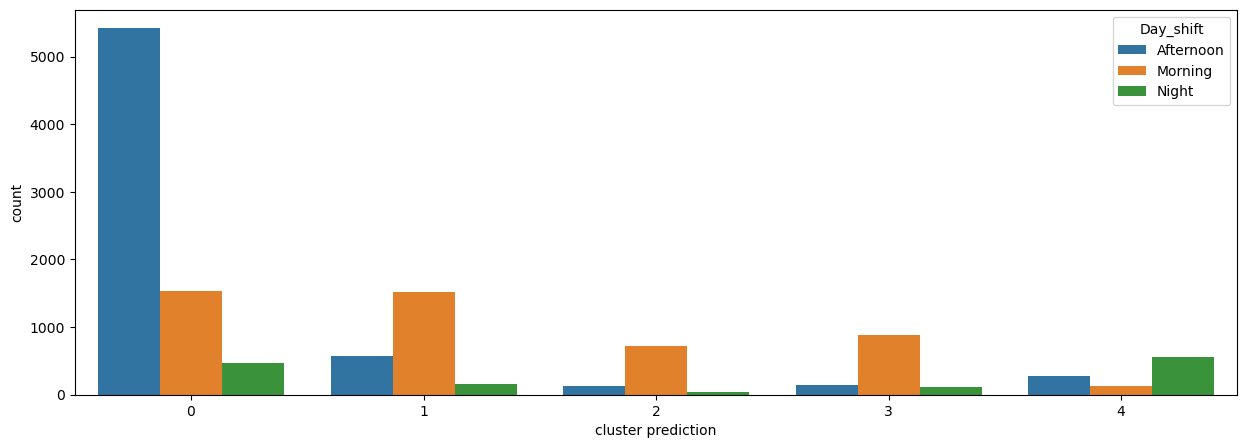

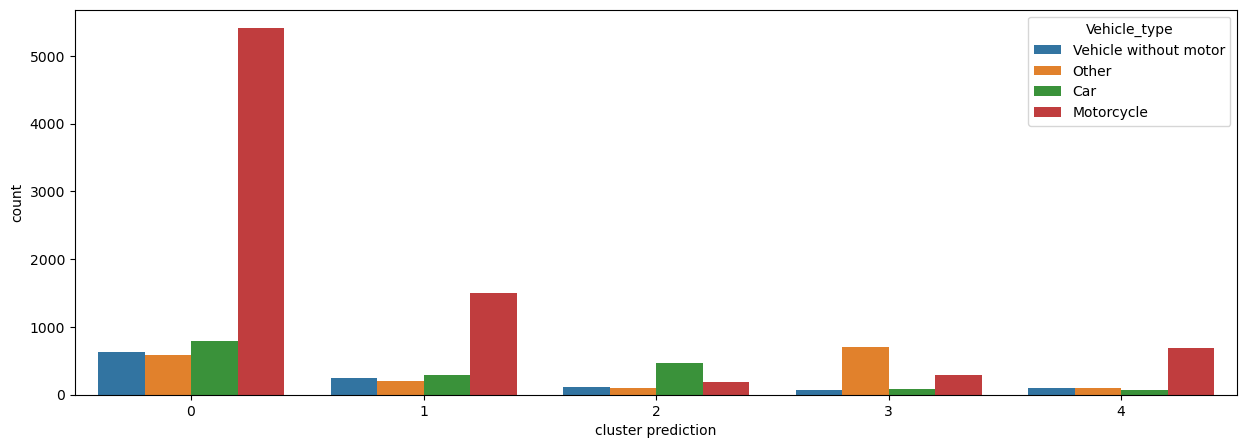

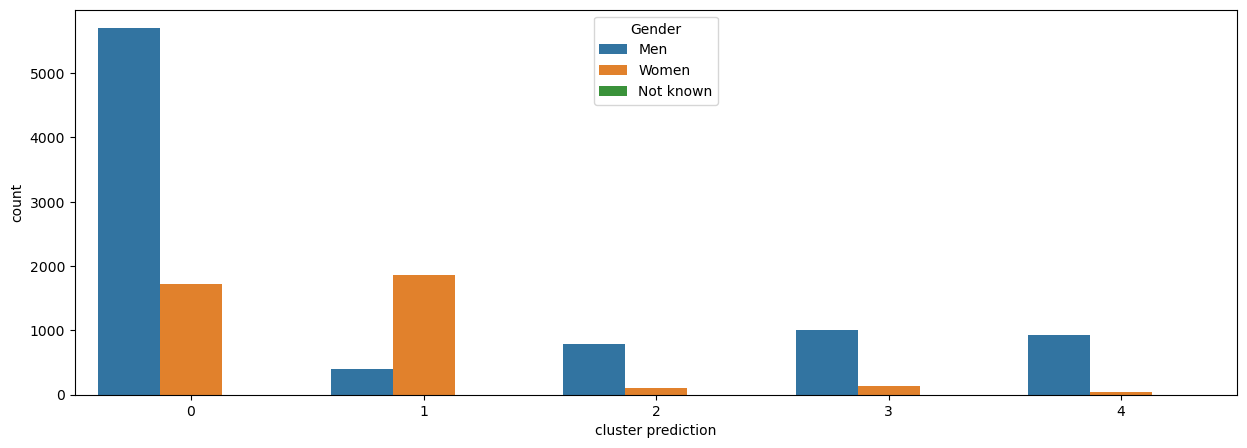

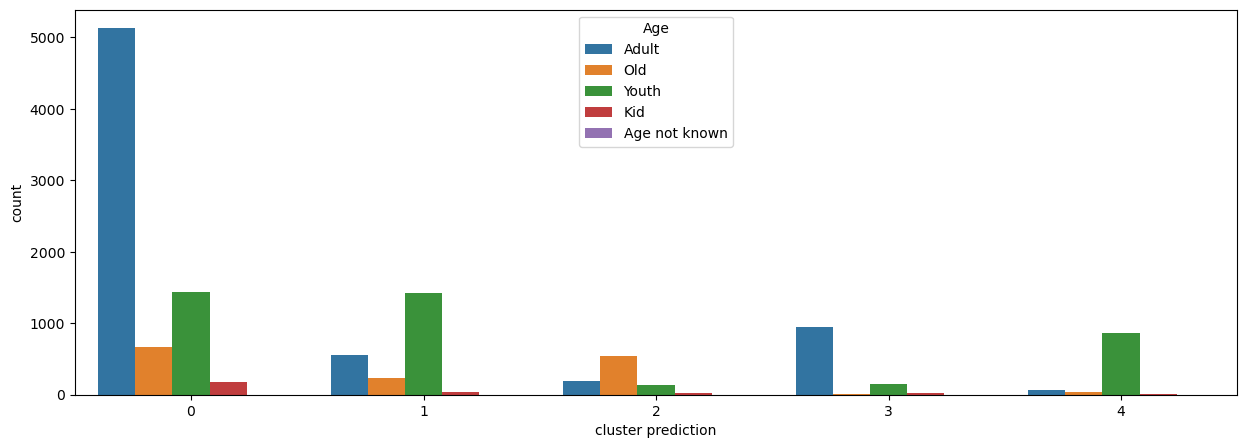

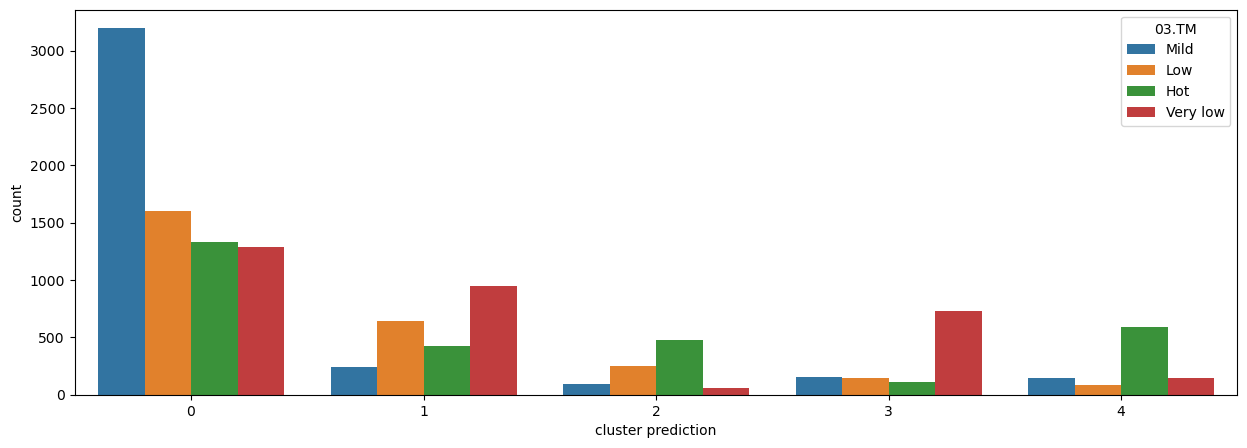

In [176]:
all_features=['Day_shift','Vehicle_type','Gender','Age','03.TM']
for col in all_features:
    plt.subplots(figsize = (15,5))
    sns.countplot(x='cluster prediction',hue=col, data = combinedDF)
    plt.show()

In [177]:
print(table)

                              value          0          1          2  \
x                                                                      
Day_shift                 Afternoon  73.049454  25.222025  15.298088   
Day_shift                   Morning  20.603692  67.717584  80.314961   
Day_shift                     Night   6.346854   7.060391   4.386952   
Vehicle_type                    Car  10.685891  13.143872  52.868391   
Vehicle_type             Motorcycle  72.928177  66.785080  21.822272   
Vehicle_type                  Other   7.896510   8.969805  11.811024   
Vehicle_type  Vehicle without motor   8.489422  11.101243  13.498313   
Gender                          Men  76.809055  17.584369  88.188976   
Gender                    Not known   0.013475   0.000000   0.112486   
Gender                        Women  23.177469  82.415631  11.698538   
Age                           Adult  69.141625  24.777975  21.147357   
Age                   Age not known   0.040426   0.000000   0.11

In [178]:
table = table.drop('value', axis=1)
new_table_2 = pd.DataFrame(index=table.index.unique())
# Iterate over each column (0, 1, 2, 3) and find the highest percentage for each variable
for col in table.columns:
    col_max = table.groupby(level=0)[col].max()
    new_table_2[col] = col_max
# Display the new DataFrame
print(new_table_2)


                      0          1          2          3          4
x                                                                  
Day_shift     73.049454  67.717584  80.314961  77.237185  57.128099
Vehicle_type  72.928177  66.785080  52.868391  61.077324  71.797521
Gender        76.809055  82.415631  88.188976  87.749783  95.764463
Age           69.141625  63.454707  60.742407  82.363162  88.533058
03.TM         43.080447  41.918295  54.105737  63.683753  61.260331


In [179]:
new_table_3= new_table_2.loc[new_table_2.index != 'Cluster percentage of drivers'] = (new_table_2.loc[new_table_2.index != 'Cluster percentage of drivers'] >= 70).astype(int)
new_table_3.loc['number of significant variables'] = new_table_3.sum()

print(new_table_3)

                                 0  1  2  3  4
x                                             
Day_shift                        1  0  1  1  0
Vehicle_type                     1  0  0  0  1
Gender                           1  1  1  1  1
Age                              0  0  0  1  1
03.TM                            0  0  0  0  0
number of significant variables  3  1  2  3  3


In [180]:
new_table_3.loc['Cluster significance'] = new_table_3 .loc['number of significant variables'] / 5
print(new_table_3)

                                   0    1    2    3    4
x                                                       
Day_shift                        1.0  0.0  1.0  1.0  0.0
Vehicle_type                     1.0  0.0  0.0  0.0  1.0
Gender                           1.0  1.0  1.0  1.0  1.0
Age                              0.0  0.0  0.0  1.0  1.0
03.TM                            0.0  0.0  0.0  0.0  0.0
number of significant variables  3.0  1.0  2.0  3.0  3.0
Cluster significance             0.6  0.2  0.4  0.6  0.6


In [181]:
new_table_3.loc['Cluster significant?'] = new_table_3 .loc['Cluster significance']>=0.5
print(new_table_3)

                                   0    1    2    3    4
x                                                       
Day_shift                        1.0  0.0  1.0  1.0  0.0
Vehicle_type                     1.0  0.0  0.0  0.0  1.0
Gender                           1.0  1.0  1.0  1.0  1.0
Age                              0.0  0.0  0.0  1.0  1.0
03.TM                            0.0  0.0  0.0  0.0  0.0
number of significant variables  3.0  1.0  2.0  3.0  3.0
Cluster significance             0.6  0.2  0.4  0.6  0.6
Cluster significant?             1.0  0.0  0.0  1.0  1.0


In [182]:
new_table_4= new_table_3
print(new_table_4)

                                   0    1    2    3    4
x                                                       
Day_shift                        1.0  0.0  1.0  1.0  0.0
Vehicle_type                     1.0  0.0  0.0  0.0  1.0
Gender                           1.0  1.0  1.0  1.0  1.0
Age                              0.0  0.0  0.0  1.0  1.0
03.TM                            0.0  0.0  0.0  0.0  0.0
number of significant variables  3.0  1.0  2.0  3.0  3.0
Cluster significance             0.6  0.2  0.4  0.6  0.6
Cluster significant?             1.0  0.0  0.0  1.0  1.0


In [183]:
new_table_4.loc['Significant clusters'] = np.nan
# Add a column with the percentage of significant cluster
new_table_4.loc['Significant clusters' ,'percentage of significant cluster'] = new_table_4.loc['Cluster significant?'].sum() / 5
# Transpose the dataframe back to its original orientation
# Print the resulting dataframe
print(new_table_4)

                                   0    1    2    3    4  \
x                                                          
Day_shift                        1.0  0.0  1.0  1.0  0.0   
Vehicle_type                     1.0  0.0  0.0  0.0  1.0   
Gender                           1.0  1.0  1.0  1.0  1.0   
Age                              0.0  0.0  0.0  1.0  1.0   
03.TM                            0.0  0.0  0.0  0.0  0.0   
number of significant variables  3.0  1.0  2.0  3.0  3.0   
Cluster significance             0.6  0.2  0.4  0.6  0.6   
Cluster significant?             1.0  0.0  0.0  1.0  1.0   
Significant clusters             NaN  NaN  NaN  NaN  NaN   

                                 percentage of significant cluster  
x                                                                   
Day_shift                                                      NaN  
Vehicle_type                                                   NaN  
Gender                                                         